In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("customer_support_tickets.csv", encoding='latin1')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [5]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [10]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [11]:
from nltk.tokenize import word_tokenize

print(word_tokenize("This is a test sentence."))

['This', 'is', 'a', 'test', 'sentence', '.']


In [12]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

In [13]:
df['cleaned_text'] = df['Ticket Description'].apply(clean_text)
df[['Ticket Description', 'cleaned_text']].head()

,Ticket Description,cleaned_text
0,I'm having an issue with the {product_purchase...,im issue productpurchased please assist billin...
1,I'm having an issue with the {product_purchase...,im issue productpurchased please assist need c...
2,I'm facing a problem with my {product_purchase...,im facing problem productpurchased productpurc...
3,I'm having an issue with the {product_purchase...,im issue productpurchased please assist proble...
4,I'm having an issue with the {product_purchase...,im issue productpurchased please assist note s...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

In [15]:
y = df['Ticket Type']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.19716646989374262
                      precision    recall  f1-score   support

     Billing inquiry       0.19      0.13      0.16       357
Cancellation request       0.18      0.18      0.18       327
     Product inquiry       0.18      0.19      0.19       316
      Refund request       0.20      0.23      0.22       345
     Technical issue       0.22      0.25      0.23       349

            accuracy                           0.20      1694
           macro avg       0.20      0.20      0.19      1694
        weighted avg       0.20      0.20      0.19      1694



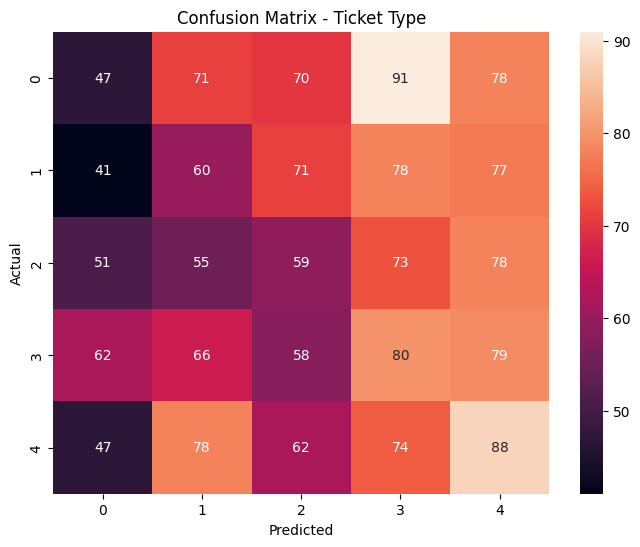

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Ticket Type")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
y_priority = df['Ticket Priority']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_priority, test_size=0.2, random_state=42
)

priority_model = LogisticRegression(max_iter=1000)
priority_model.fit(X_train, y_train)

priority_pred = priority_model.predict(X_test)

print(classification_report(y_test, priority_pred))

              precision    recall  f1-score   support

    Critical       0.25      0.27      0.26       411
        High       0.27      0.27      0.27       409
         Low       0.24      0.23      0.24       415
      Medium       0.29      0.27      0.28       459

    accuracy                           0.26      1694
   macro avg       0.26      0.26      0.26      1694
weighted avg       0.26      0.26      0.26      1694

